In [1]:
######### Importing Libraries ##############
import pandas as pd
import numpy as np

In [2]:
dat_1 = pd.read_csv(r'C:\Users\NAVIN\Desktop\Janta Hack\train.csv') ## Reading train dataset
dat_2 = pd.read_csv(r'C:\Users\NAVIN\Desktop\Janta Hack\game_overview.csv') ## Reading game overview
test_dat = pd.read_csv(r'C:\Users\NAVIN\Desktop\Janta Hack\test.csv')

In [3]:
dat_1.dtypes

review_id            int64
title               object
year               float64
user_review         object
user_suggestion      int64
dtype: object

In [4]:
print(dat_1.shape)
print(dat_1.head()) ## Top rows of train _dataset

(17494, 5)
   review_id                        title    year  \
0          1  Spooky's Jump Scare Mansion  2016.0   
1          2  Spooky's Jump Scare Mansion  2016.0   
2          3  Spooky's Jump Scare Mansion  2016.0   
3          4  Spooky's Jump Scare Mansion  2015.0   
4          5  Spooky's Jump Scare Mansion  2015.0   

                                         user_review  user_suggestion  
0  I'm scared and hearing creepy voices.  So I'll...                1  
1  Best game, more better than Sam Pepper's YouTu...                1  
2  A littly iffy on the controls, but once you kn...                1  
3  Great game, fun and colorful and all that.A si...                1  
4  Not many games have the cute tag right next to...                1  


In [5]:
print(dat_2.shape)
print(dat_2.head()) ## To rows of test dataset

(64, 5)
                              title                          developer  \
0       Spooky's Jump Scare Mansion                       Lag Studios    
1                    Sakura Clicker                      Winged Cloud    
2                           WARMODE                           WARTEAM    
3                   Fractured Space              Edge Case Games Ltd.    
4  Counter-Strike: Global Offensive  Valve, Hidden Path Entertainment    

               publisher                                               tags  \
0           Lag Studios   ['Horror', 'Free to Play', 'Cute', 'First-Pers...   
1          Winged Cloud   ['Nudity', 'Anime', 'Free to Play', 'Mature', ...   
2               WARTEAM   ['Early Access', 'Free to Play', 'FPS', 'Multi...   
3  Edge Case Games Ltd.   ['Space', 'Multiplayer', 'Free to Play', 'PvP'...   
4                 Valve   ['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...   

                                            overview  
0  Can you surviv

In [6]:
dat_2.nunique()

title        64
developer    59
publisher    54
tags         64
overview     62
dtype: int64

In [7]:
## Checking missing values ##
print(dat_1.isnull().sum())
print(test_dat.isnull().sum())

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64
review_id       0
title           0
year           67
user_review     0
dtype: int64


In [8]:
## Imputing missing values by mode ##
dat_1['year'] = dat_1['year'].astype('object')
test_dat['year'] = test_dat['year'].astype('object')
dat_1['year'] = dat_1['year'].fillna(dat_1['year'].mode().iloc[0])
test_dat['year'] = test_dat['year'].fillna(test_dat['year'].mode().iloc[0])

In [9]:
## Checking missing values ##
print(dat_1.isnull().sum())
print(test_dat.isnull().sum())

review_id          0
title              0
year               0
user_review        0
user_suggestion    0
dtype: int64
review_id      0
title          0
year           0
user_review    0
dtype: int64


In [10]:
### Checking top rows of Train dataset ###
dat_1.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [11]:
dat_2.head()

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Pers...",Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', ...",The latest entry in the Sakura series is more ...
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multi...",Free to play shooter about the confrontation o...
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP'...",Take the helm of a gigantic capital ship and g...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'T...",Counter-Strike: Global Offensive (CS: GO) expa...


In [12]:
test_dat.head()

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. B..."
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,Edit 11/12/18I have tried playing CS:GO recent...
3,1606,Counter-Strike: Global Offensive,2015.0,The game is great. But the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,I thank TrulyRazor for buying this for me a lo...


In [13]:
## Checking class imbalance ##
dat_1["user_suggestion"].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [14]:
### Coverting into text data ###
import string
from nltk.corpus import stopwords
stp = stopwords.words("English")
stp

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
## Removing punctuation and topwords
def text_process(sugg):
    nopunc = [char for char in sugg if char not in string.punctuation]
    nopunc = "".join(nopunc)
    return [word for word in nopunc.split() if word not in stp]

In [16]:
### Extracting user review and user suggestion ###
dat_tr = dat_1
dat_ts = test_dat

## Making all the characters into lower case##
dat_tr['user_review'] = dat_tr['user_review'].apply(str.lower)
dat_ts['user_review'] = dat_ts['user_review'].apply(str.lower)

In [17]:
## Removing stopwords ##
dc_tr = dat_tr.user_review.apply(text_process)
dc_tr = pd.concat([dc_tr,dat_tr['user_suggestion']],axis = 1)

In [18]:
dc_tr.tail()

,user_review,user_suggestion
17489,"[arguably, single, greatest, mmorp, exists, to...",1
17490,"[older, game, sure, charm, holds, special, pla...",1
17491,"[frist, started, playing, everquest, 2, amazin...",1
17492,"[cool, game, thing, really, pisses, ridable, t...",1
17493,"[game, since, little, kid, always, since, stil...",1


In [19]:
recommend = dc_tr[dc_tr['user_suggestion']==1]
not_recommend = dc_tr[dc_tr['user_suggestion']==0]

not_recommend.head()

,user_review,user_suggestion
8,"[somewhere, light, hearted, happy, parody, afr...",0
91,"[nice, elements, overall, quite, boring, repet...",0
93,"[boring, jump, scares, 0, effect, youre, one, ...",0
99,"[hell, rubbish, theres, nothing, go, one, door...",0
100,"[bad, game, waaaay, slow, practically, nothing...",0


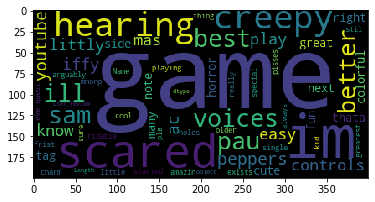

In [20]:
## Word Cloud ##
### Build the word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud().generate(str(recommend.user_review))

plt.imshow(cloud)

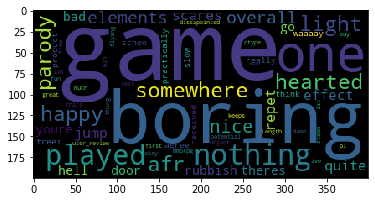

In [21]:
cloud = WordCloud().generate(str(not_recommend.user_review))
plt.imshow(cloud)

In [22]:
### Removing punctuation and numbers ##
import re

for i in range(0,dat_tr.shape[0]):
    dat_tr.loc[i,'user_review']= re.sub(r'['+string.punctuation+']','',dat_tr.loc[i,'user_review'])
    dat_tr.loc[i,'user_review']= re.sub(r'\d+','',dat_tr.loc[i,'user_review'])

dat_tr.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,im scared and hearing creepy voices so ill pa...,1
1,2,Spooky's Jump Scare Mansion,2016.0,best game more better than sam peppers youtube...,1
2,3,Spooky's Jump Scare Mansion,2016.0,a littly iffy on the controls but once you kno...,1
3,4,Spooky's Jump Scare Mansion,2015.0,great game fun and colorful and all thata side...,1
4,5,Spooky's Jump Scare Mansion,2015.0,not many games have the cute tag right next to...,1


In [23]:
for i in range(0,dat_ts.shape[0]):
    dat_ts.loc[i,'user_review']= re.sub('['+string.punctuation+']','',dat_ts.loc[i,'user_review'])
    dat_ts.loc[i,'user_review']= re.sub(r'\d+','',dat_ts.loc[i,'user_review'])

dat_ts.head()

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,nice graphics new maps weapons and models but ...
1,1604,Counter-Strike: Global Offensive,2018.0,i would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,edit i have tried playing csgo recently and it...
3,1606,Counter-Strike: Global Offensive,2015.0,the game is great but the community is the wor...
4,1607,Counter-Strike: Global Offensive,2015.0,i thank trulyrazor for buying this for me a lo...


In [51]:
### Removing numbers ###


In [24]:
dat_tr['user_suggestion'] = dat_tr['user_suggestion'].astype('category')
dat_tr.dtypes

review_id             int64
title                object
year                float64
user_review          object
user_suggestion    category
dtype: object

In [25]:
### Creating dummy variables of title ###
dat = pd.concat([dat_1.loc[:,['review_id','title']],test_dat.loc[:,['review_id','title']]],axis = 0,ignore_index = True)
dat = pd.get_dummies(dat)
dat.head()

,review_id,title_AdventureQuest 3D,title_Aura Kingdom,title_Black Squad,title_Bless Online,title_Bloons TD Battles,title_Brawlhalla,title_Business Tour - Board Game with Online Multiplayer,title_Champions Online,title_Counter-Strike: Global Offensive,...,title_Tree of Savior (English Ver.),title_Trove,title_VEGA Conflict,title_WARMODE,title_War Thunder,title_World of Guns: Gun Disassembly,title_World of Tanks Blitz,title_World of Warships,title_Yu-Gi-Oh! Duel Links,title_theHunter Classic
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
## Merging with data ##
dat_tr = pd.merge(dat_tr,dat,on = "review_id")
dat_ts = pd.merge(dat_ts,dat,on = "review_id")

print(dat_tr.shape)
print(dat_ts.shape)

(17494, 69)
(8045, 68)


In [27]:
test_dat.head()

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,nice graphics new maps weapons and models but ...
1,1604,Counter-Strike: Global Offensive,2018.0,i would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,edit i have tried playing csgo recently and it...
3,1606,Counter-Strike: Global Offensive,2015.0,the game is great but the community is the wor...
4,1607,Counter-Strike: Global Offensive,2015.0,i thank trulyrazor for buying this for me a lo...


In [28]:
##################### Using Textblob #####################
print(dat_tr.head())
print(dat_ts.head())

   review_id                        title    year  \
0          1  Spooky's Jump Scare Mansion  2016.0   
1          2  Spooky's Jump Scare Mansion  2016.0   
2          3  Spooky's Jump Scare Mansion  2016.0   
3          4  Spooky's Jump Scare Mansion  2015.0   
4          5  Spooky's Jump Scare Mansion  2015.0   

                                         user_review user_suggestion  \
0  im scared and hearing creepy voices  so ill pa...               1   
1  best game more better than sam peppers youtube...               1   
2  a littly iffy on the controls but once you kno...               1   
3  great game fun and colorful and all thata side...               1   
4  not many games have the cute tag right next to...               1   

   title_AdventureQuest 3D  title_Aura Kingdom  title_Black Squad  \
0                        0                   0                  0   
1                        0                   0                  0   
2                        0               

In [29]:
######### Using Textblob ############
from textblob import TextBlob

In [30]:
#### Creating Textdata
txt_dt_tr = pd.DataFrame(dat_tr.iloc[:,2:len(dat_tr)])
txt_dt_ts = pd.DataFrame(dat_ts.iloc[:,2:len(dat_ts)])
print(txt_dt_tr.head())
print(txt_dt_ts.head())

     year                                        user_review user_suggestion  \
0  2016.0  im scared and hearing creepy voices  so ill pa...               1   
1  2016.0  best game more better than sam peppers youtube...               1   
2  2016.0  a littly iffy on the controls but once you kno...               1   
3  2015.0  great game fun and colorful and all thata side...               1   
4  2015.0  not many games have the cute tag right next to...               1   

   title_AdventureQuest 3D  title_Aura Kingdom  title_Black Squad  \
0                        0                   0                  0   
1                        0                   0                  0   
2                        0                   0                  0   
3                        0                   0                  0   
4                        0                   0                  0   

   title_Bless Online  title_Bloons TD Battles  title_Brawlhalla  \
0                   0               

In [31]:
########## Creating two new variables polarity score and subjectivity ############
def polarity(text):
    try:
        return TextBlob(text).polarity
    except:
        return None
    
def subjectivity(text):
    try:
        return TextBlob(text).subjectivity
    except:
        return None
    
txt_dt_tr['polarity'] = txt_dt_tr['user_review'].apply(polarity)
txt_dt_tr['subjectivity'] = txt_dt_tr['user_review'].apply(subjectivity)

In [50]:
txt_dt_ts['polarity'] = txt_dt_ts['user_review'].apply(polarity)
txt_dt_ts['subjectivity'] = txt_dt_ts['user_review'].apply(subjectivity)

In [51]:
print(txt_dt_tr.head())
print(txt_dt_ts.head())

     year                                        user_review  user_suggestion  \
0  2016.0  im scared and hearing creepy voices  so ill pa...                1   
1  2016.0  best game more better than sam peppers youtube...                1   
2  2016.0  a littly iffy on the controls but once you kno...                1   
3  2015.0  great game fun and colorful and all thata side...                1   
4  2015.0  not many games have the cute tag right next to...                1   

   polarity  subjectivity  
0 -0.080556      0.677778  
1  0.228571      0.471429  
2  0.011374      0.577554  
3  0.214286      0.550000  
4  0.045408      0.457313  
     year                                        user_review  polarity  \
0  2015.0  nice graphics new maps weapons and models but ...  0.239394   
1  2018.0  i would not recommend getting into this at its... -0.204293   
2  2018.0  edit i have tried playing csgo recently and it...  0.023715   
3  2015.0  the game is great but the community is

In [29]:
txt_dt_tr = txt_dt_tr.drop(columns = ['user_review'])
txt_dt_ts = txt_dt_ts.drop(columns = ['user_review'])
print(txt_dt_tr.head())
print(txt_dt_ts.head())

     year user_suggestion  title_AdventureQuest 3D  title_Aura Kingdom  \
0  2016.0               1                        0                   0   
1  2016.0               1                        0                   0   
2  2016.0               1                        0                   0   
3  2015.0               1                        0                   0   
4  2015.0               1                        0                   0   

   title_Black Squad  title_Bless Online  title_Bloons TD Battles  \
0                  0                   0                        0   
1                  0                   0                        0   
2                  0                   0                        0   
3                  0                   0                        0   
4                  0                   0                        0   

   title_Brawlhalla  title_Business Tour - Board Game with Online Multiplayer  \
0                 0                                        

In [30]:
##### Splitting Data in Train and Test #####
import sklearn
from sklearn.model_selection import train_test_split

x = txt_dt_tr.drop(columns = ['user_suggestion'])
y = txt_dt_tr.loc[:,'user_suggestion']

x_trn, x_tst, y_trn, y_tst = train_test_split(x,y,test_size = 0.25, random_state = 101)

### Train ###
print(x_trn.shape)
print(y_trn.shape)

### Test ###
print(x_tst.shape)
print(y_tst.shape)

(13120, 67)
(13120,)
(4374, 67)
(4374,)


In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1000, stop = 1200, num = 200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 60, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
randm = RandomForestClassifier(random_state = 43)
random = RandomizedSearchCV(estimator = randm, param_distributions = random_grid, cv = 5, verbose=2, random_state=42, n_jobs = -1)
random.fit(x_trn,y_trn)

print(random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 13.2min finished


{'n_estimators': 1086, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 35, 'bootstrap': True}


In [45]:
##### Random Forest Model #####
from sklearn.ensemble import RandomForestClassifier
randm = RandomForestClassifier(n_estimators = 1086,min_samples_split = 3,max_features = 'auto',min_samples_leaf = 4,max_depth = 35,bootstrap = True,random_state = 73)

#random = RandomizedSearchCV(estimator = randm, param_distributions = random_grid, cv = 5, verbose=2, random_state=42, n_jobs = -1)
#random.fit(x_trn,y_trn)

# print results
#print(random.best_params_)

## Fitting the model ##
randm_model = randm.fit(x_trn,y_trn)

In [46]:
## Fitting the model ##
# randm_model = randm.fit(x_trn,y_trn)

In [47]:
## Predicting Values ##
pred_value_rf = randm.predict(x_tst)
pred_value_rf

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

In [49]:
## Confusion matrix ##
from sklearn.metrics import confusion_matrix,classification_report

confusion_matrix(y_tst, pred_value_rf)

array([[1291,  570],
       [ 364, 2149]], dtype=int64)

In [50]:
## Classification Report ##
print(classification_report(y_tst, pred_value_rf, digits=3))

              precision    recall  f1-score   support

           0      0.780     0.694     0.734      1861
           1      0.790     0.855     0.821      2513

    accuracy                          0.786      4374
   macro avg      0.785     0.774     0.778      4374
weighted avg      0.786     0.786     0.784      4374



In [129]:
########### GBM Model ###########
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=3, min_samples_split=4,min_samples_leaf = 1,max_features='sqrt', random_state=43)
gbm_mdl = gbm.fit(x_trn,y_trn)

In [130]:
pred_gbm = gbm_mdl.predict(x_tst)
print(classification_report(y_tst, pred_gbm,digits=3))

              precision    recall  f1-score   support

           0      0.781     0.706     0.742      1861
           1      0.797     0.853     0.824      2513

    accuracy                          0.791      4374
   macro avg      0.789     0.780     0.783      4374
weighted avg      0.790     0.791     0.789      4374



In [101]:
##### Final Prediction ####

final_predict = pd.DataFrame(gbm_mdl.predict(txt_dt_ts))


finl_sub = pd.concat([test_dat['review_id'],final_predict[0]],axis = 1)
finl_sub.head()

,review_id,0
0,1603,1
1,1604,0
2,1605,0
3,1606,1
4,1607,1


In [102]:
finl_sub.to_csv(r'C:\Users\NAVIN\Desktop\Janta Hack\final_submission.csv')

In [118]:
p_test3 = {'learning_rate':[0.05,0.011,0.01], 'n_estimators':[500,750,1000]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_trn,y_trn)
tuning.best_params_

C:\Users\NAVIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'learning_rate': 0.05, 'n_estimators': 500}

In [123]:
p_test2 = {'max_depth':[2,3,4,5,6,7,8,9,10] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05,n_estimators=500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_trn,y_trn)
tuning.best_params_

C:\Users\NAVIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'max_depth': 3}

In [126]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=3, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_trn,y_trn)
tuning.best_params_

C:\Users\NAVIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


{'min_samples_leaf': 1, 'min_samples_split': 4}